In [52]:
# Dependencies
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [53]:
city_data = pd.read_csv("./raw_data/city_data.csv")
ride_data = pd.read_csv("./raw_data/ride_data.csv")
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [118]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
data_set=city_data.merge(ride_data,on='city',how='inner',sort='True')
data_set.head()
aggre = {'fare':'mean' ,'ride_id':'count'}
# avg_fare_per_city=avg_fare_per_city[avg_fare_per_city['city']=='Alvarezhaven'].groupby('city').agg(aggre)
avg_fare_per_city=data_set.groupby('city').agg(aggre)
avg_fare_per_city.head()
data_set.head()

,city,driver_count,type,date,fare,ride_id
0,Alvarezhaven,21,Urban,2016-04-18 20:51:29,31.93,4267015736324
1,Alvarezhaven,21,Urban,2016-08-01 00:39:48,6.42,8394540350728
2,Alvarezhaven,21,Urban,2016-09-01 22:57:12,18.09,1197329964911
3,Alvarezhaven,21,Urban,2016-08-18 07:12:06,20.74,357421158941
4,Alvarezhaven,21,Urban,2016-04-04 23:45:50,14.25,6431434271355


In [112]:
avg_datframe = city_data.join(avg_fare_per_city,on='city',how='inner',sort='True')
avg_datframe.set_index('city', inplace=True)
avg_datframe.head()

,driver_count,type,fare,ride_id
city,,,,
Alvarezhaven,21,Urban,23.928710,31
Alyssaberg,67,Urban,20.609615,26
Anitamouth,16,Suburban,37.315556,9
Antoniomouth,21,Urban,23.625000,22
Aprilchester,49,Urban,21.981579,19


In [116]:
avg_datframe.rename(columns={'fare':'Avg_Fare_Per_City','ride_id':'Tot_Rides_Per_City'}, inplace=True)
avg_datframe.columns

Index(['driver_count', 'type', 'Avg_Fare_Per_City', 'Tot_Rides_Per_City'], dtype='object')

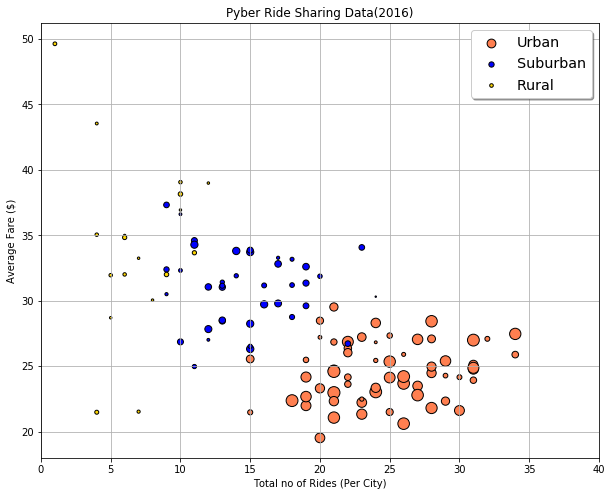

In [117]:
  #  color=  ['orange' if x == 'Urban' else 'blue' if x== 'Suburban' else 'yellow' for x in avg_datframe['type']] 
plt.figure(figsize=(10,8))
plt.scatter(avg_datframe.query('type == "Urban"')['Tot_Rides_Per_City'],avg_datframe.query('type == "Urban"')['Avg_Fare_Per_City'],s=avg_datframe.query('type == "Urban"')['driver_count'] *2,color='coral',label='Urban',edgecolors='black')
plt.scatter(avg_datframe.query('type == "Suburban"')['Tot_Rides_Per_City'],avg_datframe.query('type == "Suburban"')['Avg_Fare_Per_City'],s=avg_datframe.query('type == "Suburban"')['driver_count']*2,color='blue',label='Suburban',edgecolors='black')
plt.scatter(avg_datframe.query('type == "Rural"')['Tot_Rides_Per_City'],avg_datframe.query('type == "Rural"')['Avg_Fare_Per_City'],s=avg_datframe.query('type == "Rural"')['driver_count']*2,color='gold',label='Rural',edgecolors='black')
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total no of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,40)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.show()


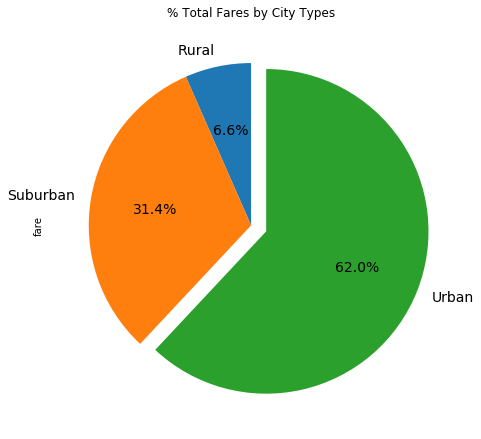

In [141]:
 aggre = {'fare':'sum' }
# avg_fare_per_city=avg_fare_per_city[avg_fare_per_city['city']=='Alvarezhaven'].groupby('city').agg(aggre)
tot_fare =data_set.groupby('type').agg(aggre)
plt.figure(figsize=(16,8))
explode = (0, 0, 0.1)
# plot chart
ax1 = plt.subplot(121, aspect='equal')
tot_fare.plot(kind='pie', y = 'fare', ax=ax1,explode=explode, autopct='%1.1f%%', startangle=90, shadow=False, labels=tot_fare.index, legend = False, fontsize=14)
plt.title("% Total Fares by City Types")
plt.show()

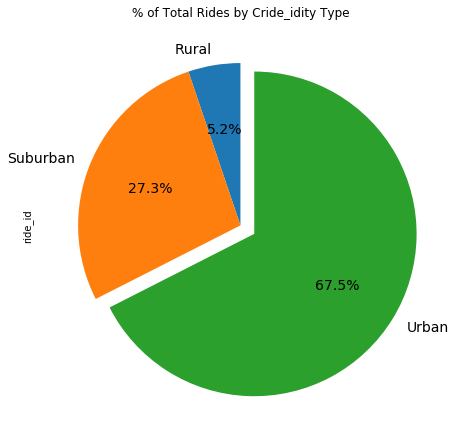

In [142]:
 aggre = {'ride_id':'count' }
# avg_fare_per_city=avg_fare_per_city[avg_fare_per_city['city']=='Alvarezhaven'].groupby('city').agg(aggre)
tot_fare =data_set.groupby('type').agg(aggre)
plt.figure(figsize=(16,8))
explode = (0, 0, 0.1)
# plot chart
ax1 = plt.subplot(121, aspect='equal')
tot_fare.plot(kind='pie', y = 'ride_id', ax=ax1,explode=explode, autopct='%1.1f%%', startangle=90, shadow=False, labels=tot_fare.index, legend = False, fontsize=14)
plt.title("% of Total Rides by Cride_idity Type")
plt.show()

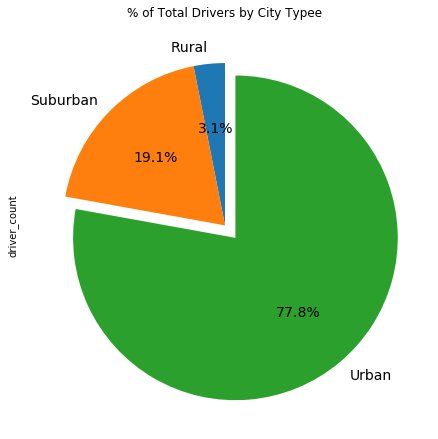

In [145]:
 aggre = {'driver_count':'sum' }
# avg_fare_per_city=avg_fare_per_city[avg_fare_per_city['city']=='Alvarezhaven'].groupby('city').agg(aggre)
tot_fare =city_data.groupby('type').agg(aggre)
plt.figure(figsize=(16,8))
explode = (0, 0, 0.1)
# plot chart
ax1 = plt.subplot(121, aspect='equal')
tot_fare.plot(kind='pie', y = 'driver_count', ax=ax1,explode=explode, autopct='%1.1f%%', startangle=90, shadow=False, labels=tot_fare.index, legend = False, fontsize=14)
plt.title("% of Total Drivers by City Typee")
plt.show()